# Customer Personality Analysis

# Goal

 Need to perform clustering to summarize customer segments.

In [159]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [160]:
#reading the dataset

data = pd.read_csv(r"C:\Users\Akanksha\Downloads\Datasets\customer personality analysis dataset.csv",delimiter=';')

# Data Exploration

In [161]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [162]:
data.shape

(2240, 29)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [164]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [165]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [166]:
data.corr()['Income']

ID                     0.013095
Year_Birth            -0.161791
Income                 1.000000
Kidhome               -0.428669
Teenhome               0.019133
Recency               -0.003970
MntWines               0.578650
MntFruits              0.430842
MntMeatProducts        0.584633
MntFishProducts        0.438871
MntSweetProducts       0.440744
MntGoldProds           0.325916
NumDealsPurchases     -0.083101
NumWebPurchases        0.387878
NumCatalogPurchases    0.589162
NumStorePurchases      0.529362
NumWebVisitsMonth     -0.553088
AcceptedCmp3          -0.016174
AcceptedCmp4           0.184400
AcceptedCmp5           0.335943
AcceptedCmp1           0.276820
AcceptedCmp2           0.087545
Complain              -0.027225
Z_CostContact               NaN
Z_Revenue                   NaN
Response               0.133047
Name: Income, dtype: float64

In [167]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

# Data Pre-processing

In [168]:
#droping unnecessary columns

data.drop(columns=['ID','Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [169]:
data.head(15)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0
5,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,...,4,10,6,0,0,0,0,0,0,0
6,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,...,3,7,6,0,0,0,0,0,0,0
7,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,...,0,4,8,0,0,0,0,0,0,0
8,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,...,0,2,9,0,0,0,0,0,0,1
9,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,...,0,0,20,1,0,0,0,0,0,0


In [170]:
data['age']=2016-data['Year_Birth']

In [171]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [172]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [173]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
age                     0
dtype: int64

In [174]:
data['Income'].mean()

52247.25135379061

In [175]:
data['Income'].median()

51381.5

In [176]:
data['Income']=data['Income'].replace(np.NaN,data['Income'].mean())

In [177]:
from datetime import date,datetime
from dateutil import relativedelta

In [178]:
#finding the membership days

today = date(2016,1,1)
diff = pd.to_datetime(today) - pd.to_datetime(data['Dt_Customer'])
data['member_Since'] = diff.dt.days

In [179]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,member_Since
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,1,59,1214
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,0,62,664
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,51,863
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,0,32,690
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,35,712


In [180]:
#dropping columns

data.drop(columns=['Year_Birth','Dt_Customer'],axis=1,inplace=True)

In [181]:
data['total_offers_accepted'] = data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

In [182]:
data.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],axis=1,inplace=True)

In [183]:
data['total_amnt_spent'] = data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

data['total_purchases'] = data[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)

In [184]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,age,member_Since,total_offers_accepted,total_amnt_spent,total_purchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,8,10,4,7,0,59,1214,1,1617,25
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,1,1,2,5,0,62,664,0,27,6
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,8,2,10,4,0,51,863,0,776,21
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,2,0,4,6,0,32,690,0,53,8
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,3,6,5,0,35,712,0,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,9,3,4,5,0,49,932,0,1341,18
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,8,2,5,7,0,70,570,1,444,22
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,2,3,13,6,0,35,706,1,1241,19
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,6,5,10,3,0,60,707,0,843,23


Income                      AxesSubplot(0.125,0.747241;0.133621x0.132759)
Kidhome                  AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Teenhome                  AxesSubplot(0.44569,0.747241;0.133621x0.132759)
Recency                  AxesSubplot(0.606034,0.747241;0.133621x0.132759)
MntWines                 AxesSubplot(0.766379,0.747241;0.133621x0.132759)
MntFruits                   AxesSubplot(0.125,0.587931;0.133621x0.132759)
MntMeatProducts          AxesSubplot(0.285345,0.587931;0.133621x0.132759)
MntFishProducts           AxesSubplot(0.44569,0.587931;0.133621x0.132759)
MntSweetProducts         AxesSubplot(0.606034,0.587931;0.133621x0.132759)
MntGoldProds             AxesSubplot(0.766379,0.587931;0.133621x0.132759)
NumDealsPurchases           AxesSubplot(0.125,0.428621;0.133621x0.132759)
NumWebPurchases          AxesSubplot(0.285345,0.428621;0.133621x0.132759)
NumCatalogPurchases       AxesSubplot(0.44569,0.428621;0.133621x0.132759)
NumStorePurchases        AxesSubplot(0

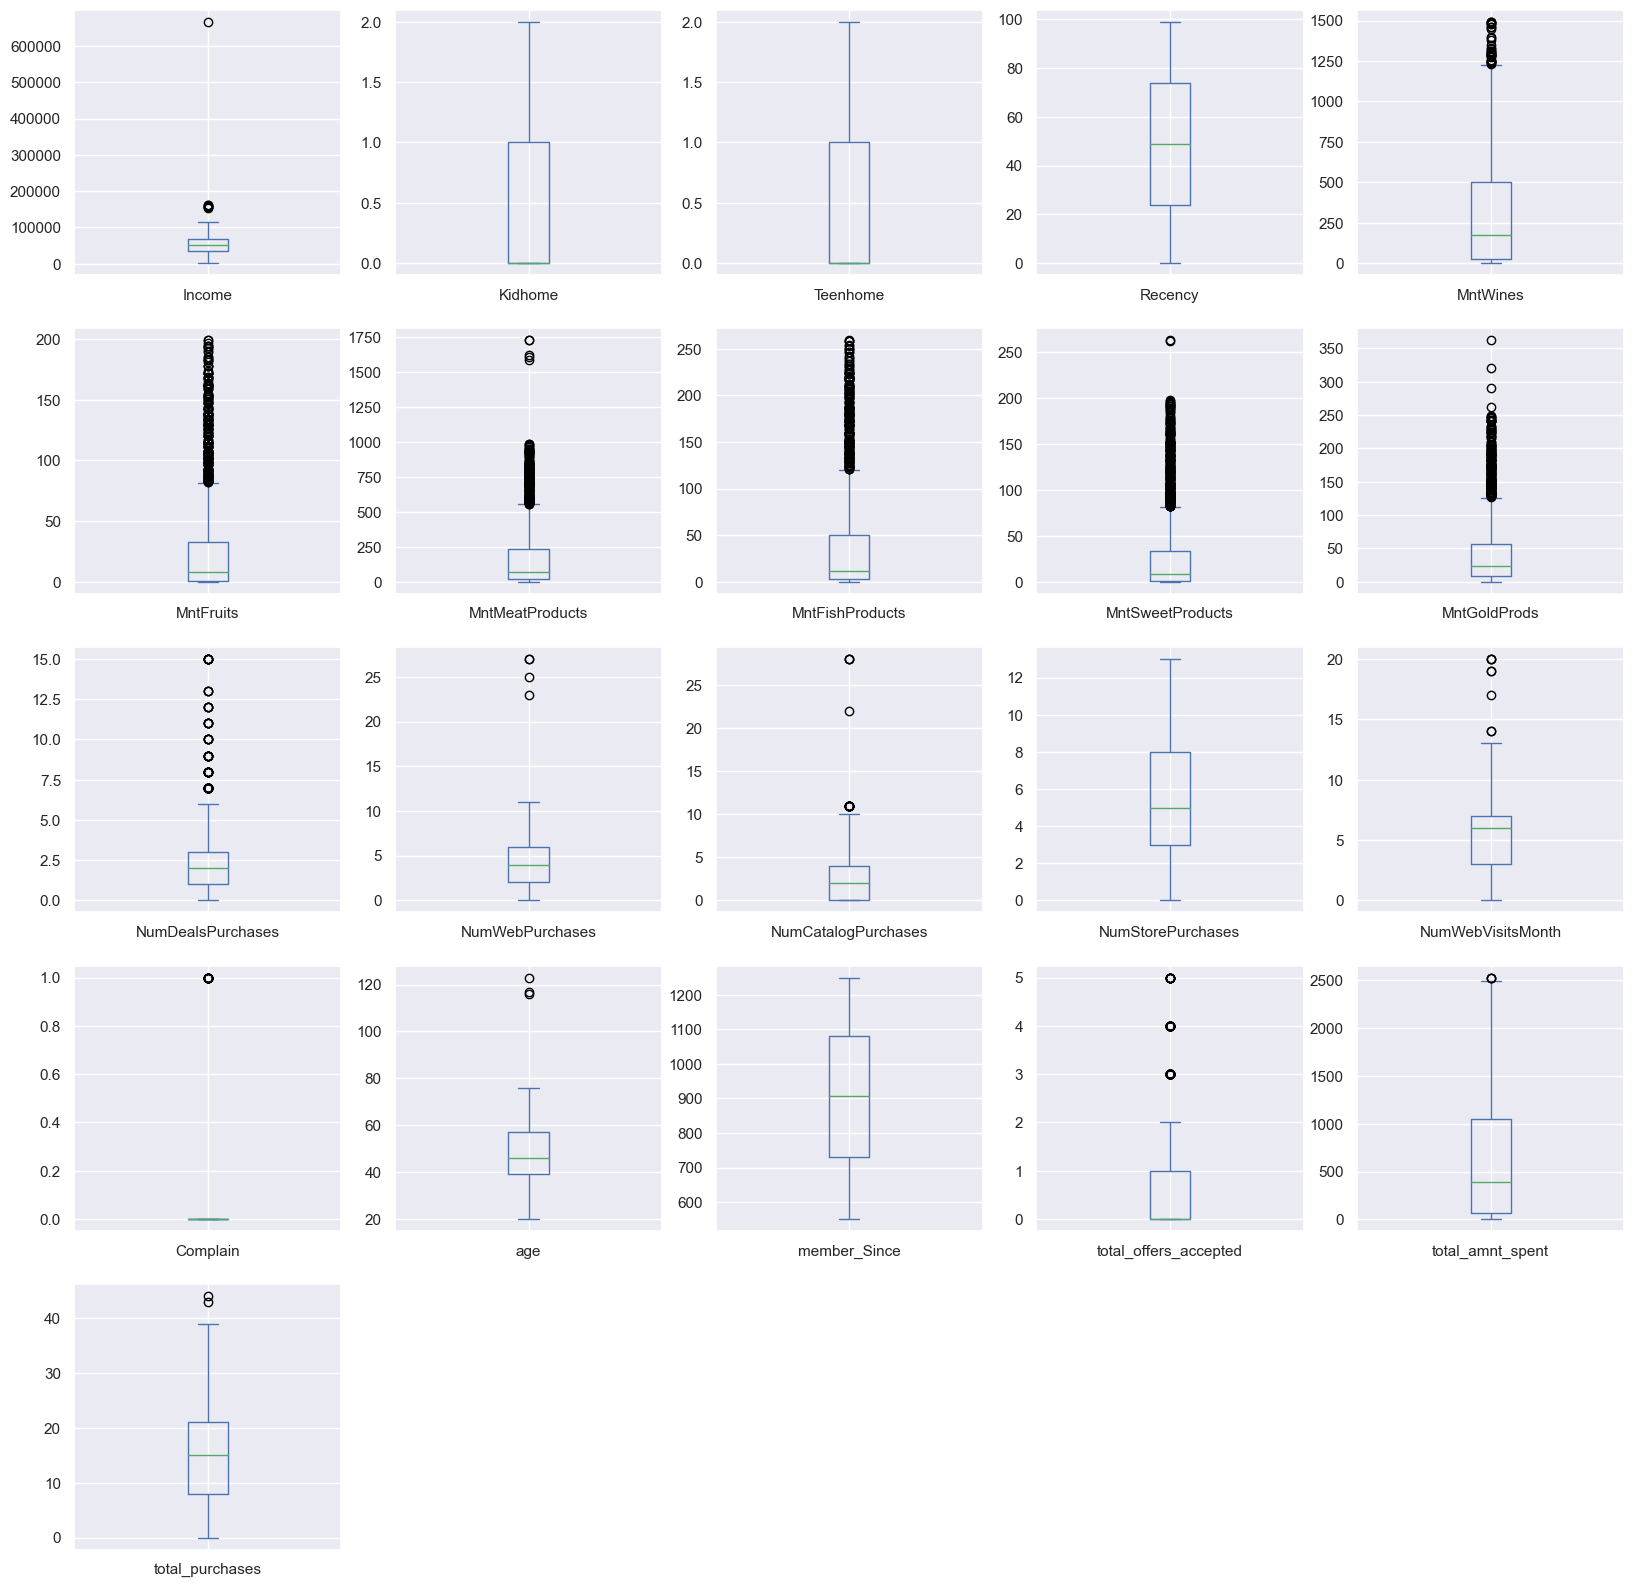

In [185]:
#checking for outliers

data.plot(kind="box", subplots=True,layout=(5,5) ,figsize=(20,20))

In [186]:
outliers=data[(data['age']>100) | (data['Income']> 200000)].index

In [187]:
data.drop(outliers,inplace=True)
data.shape

(2236, 23)

In [189]:
data['total_kid_home'] = data['Kidhome'] + data['Teenhome']

<AxesSubplot:>

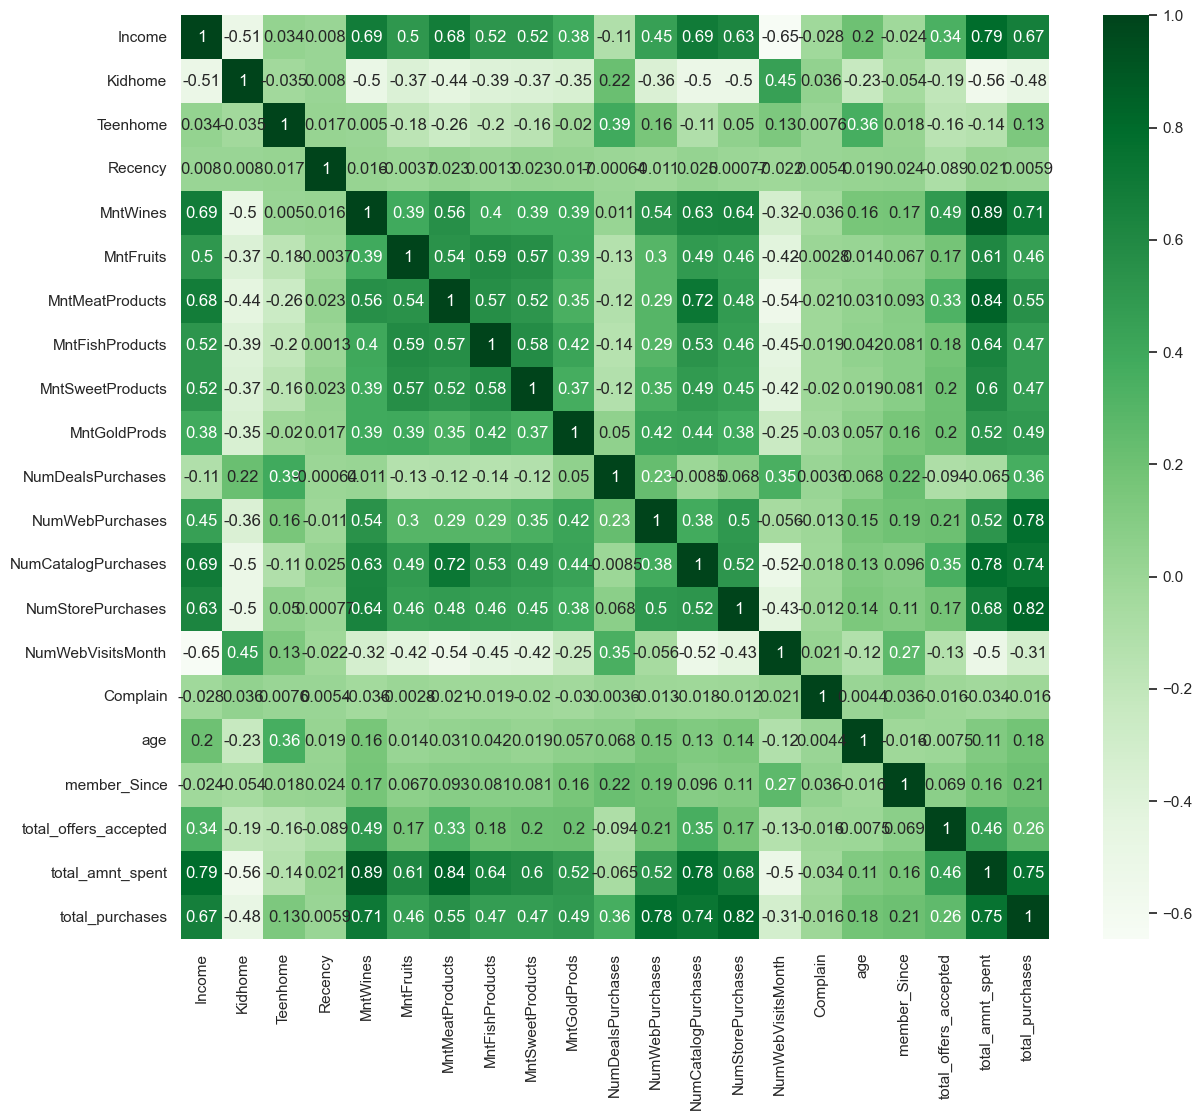

In [188]:
fig = plt.figure(figsize=(14,12))         
sns.heatmap(data.corr(), annot = True,cmap = "Greens")

In [190]:
df_final = data.copy()

In [191]:
df_final['Education']=df_final['Education'].replace('2n Cycle','Basic')

df_final['Marital_Status']=df_final['Marital_Status'].replace(['Divorced','Widow','Alone','Absurd','YOLO'],'Single').replace('Married','Together')

In [192]:
df_final.drop(columns=['Kidhome','Teenhome'],axis=1,inplace=True)

In [193]:
df_final.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'],axis=1,inplace=True)

In [194]:
df_final

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,age,member_Since,total_offers_accepted,total_amnt_spent,total_purchases,total_kid_home
0,Graduation,Single,58138.0,58,7,0,59,1214,1,1617,25,0
1,Graduation,Single,46344.0,38,5,0,62,664,0,27,6,2
2,Graduation,Together,71613.0,26,4,0,51,863,0,776,21,0
3,Graduation,Together,26646.0,26,6,0,32,690,0,53,8,1
4,PhD,Together,58293.0,94,5,0,35,712,0,422,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Together,61223.0,46,5,0,49,932,0,1341,18,1
2236,PhD,Together,64014.0,56,7,0,70,570,1,444,22,3
2237,Graduation,Single,56981.0,91,6,0,35,706,1,1241,19,0
2238,Master,Together,69245.0,8,3,0,60,707,0,843,23,1


<AxesSubplot:>

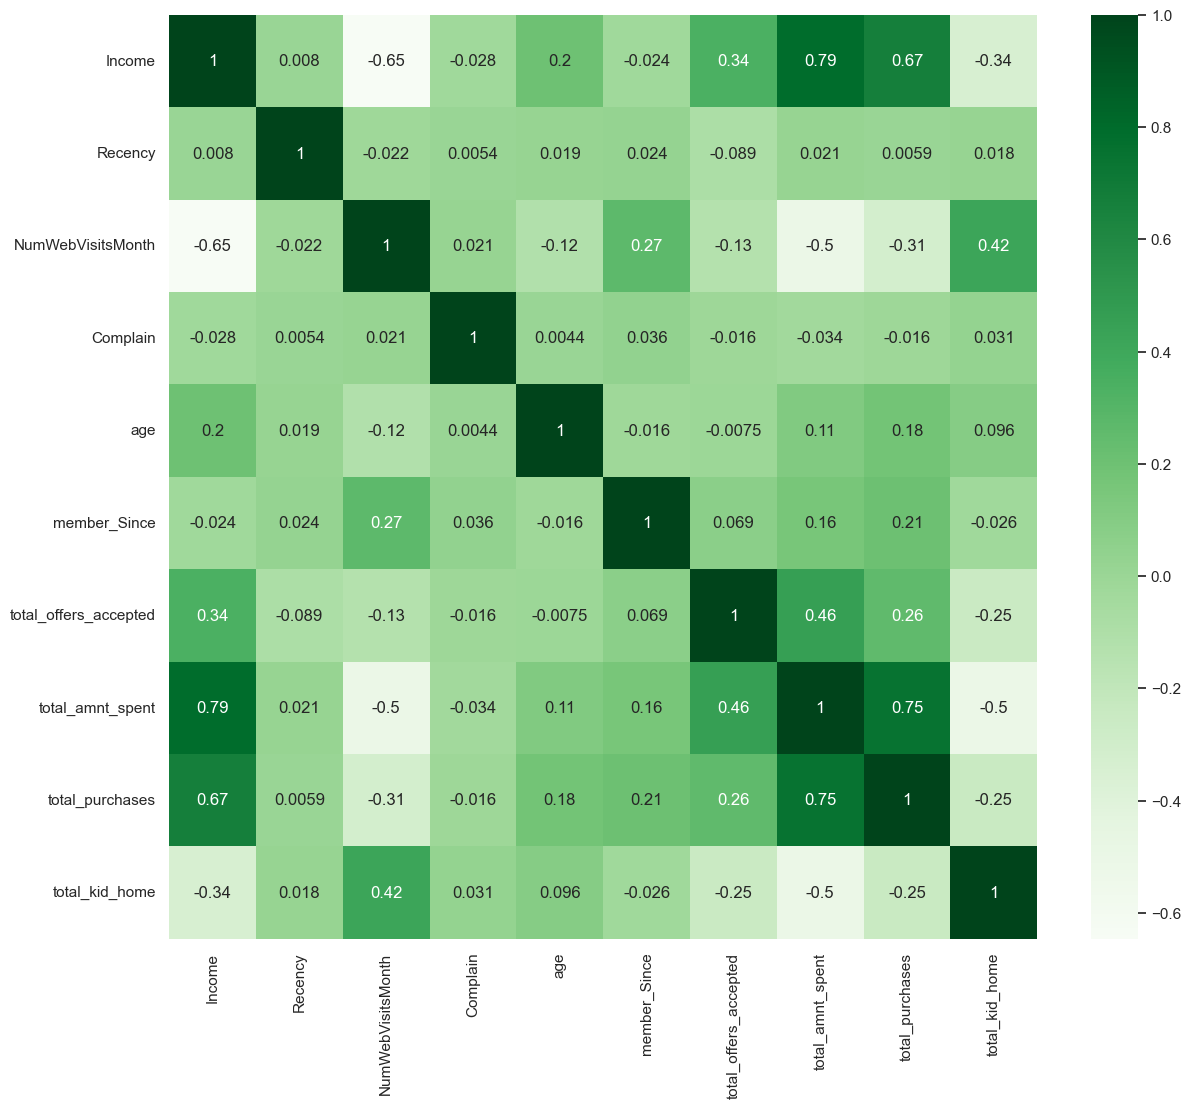

In [195]:
fig = plt.figure(figsize=(14,12))         
sns.heatmap(df_final.corr(), annot = True,cmap = "Greens")

In [196]:
edu_Dict ={   'Basic':1,
              'Graduation':2,
              'Master':3,
              'PhD':4} 

In [197]:
df_final['edu_class'] = df_final['Education'].map(edu_Dict)

In [198]:
df_final['Marital_Status'] = df_final['Marital_Status'].replace('Single',1).replace('Together',2)

In [199]:
df_final.drop('Education',axis=1,inplace=True)

In [200]:
df_final.shape

(2236, 12)

In [201]:
from sklearn import preprocessing

In [202]:
scaler = preprocessing.StandardScaler()

In [203]:
d_trans = pd.DataFrame(scaler.fit_transform(df_final))

# Clustering

In [204]:
from sklearn.cluster import KMeans

X =d_trans

C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory le

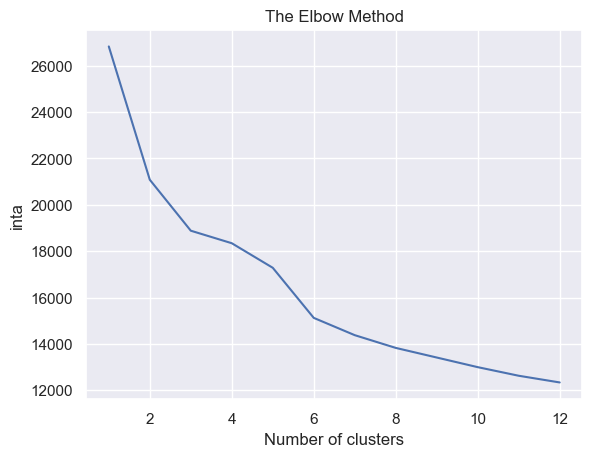

In [205]:
inta=[]
for i in range (1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    inta.append(kmeans.inertia_)
plt.plot(range(1,13),inta)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inta')
plt.show()

In [206]:
kmeans = KMeans(n_clusters=3, init="k-means++",random_state=0)
kmeans.fit(d_trans)

C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [207]:
y=kmeans.predict(X)

In [208]:
d_trans['Cluster'] = kmeans.labels_

In [209]:
df_final['Cluster'] = kmeans.labels_

In [210]:
data['Cluster']=kmeans.labels_

In [211]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,Complain,age,member_Since,total_offers_accepted,total_amnt_spent,total_purchases,total_kid_home,Cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,59,1214,1,1617,25,0,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,62,664,0,27,6,2,1
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,51,863,0,776,21,0,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,32,690,0,53,8,1,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,35,712,0,422,19,1,0


# Data Analysis

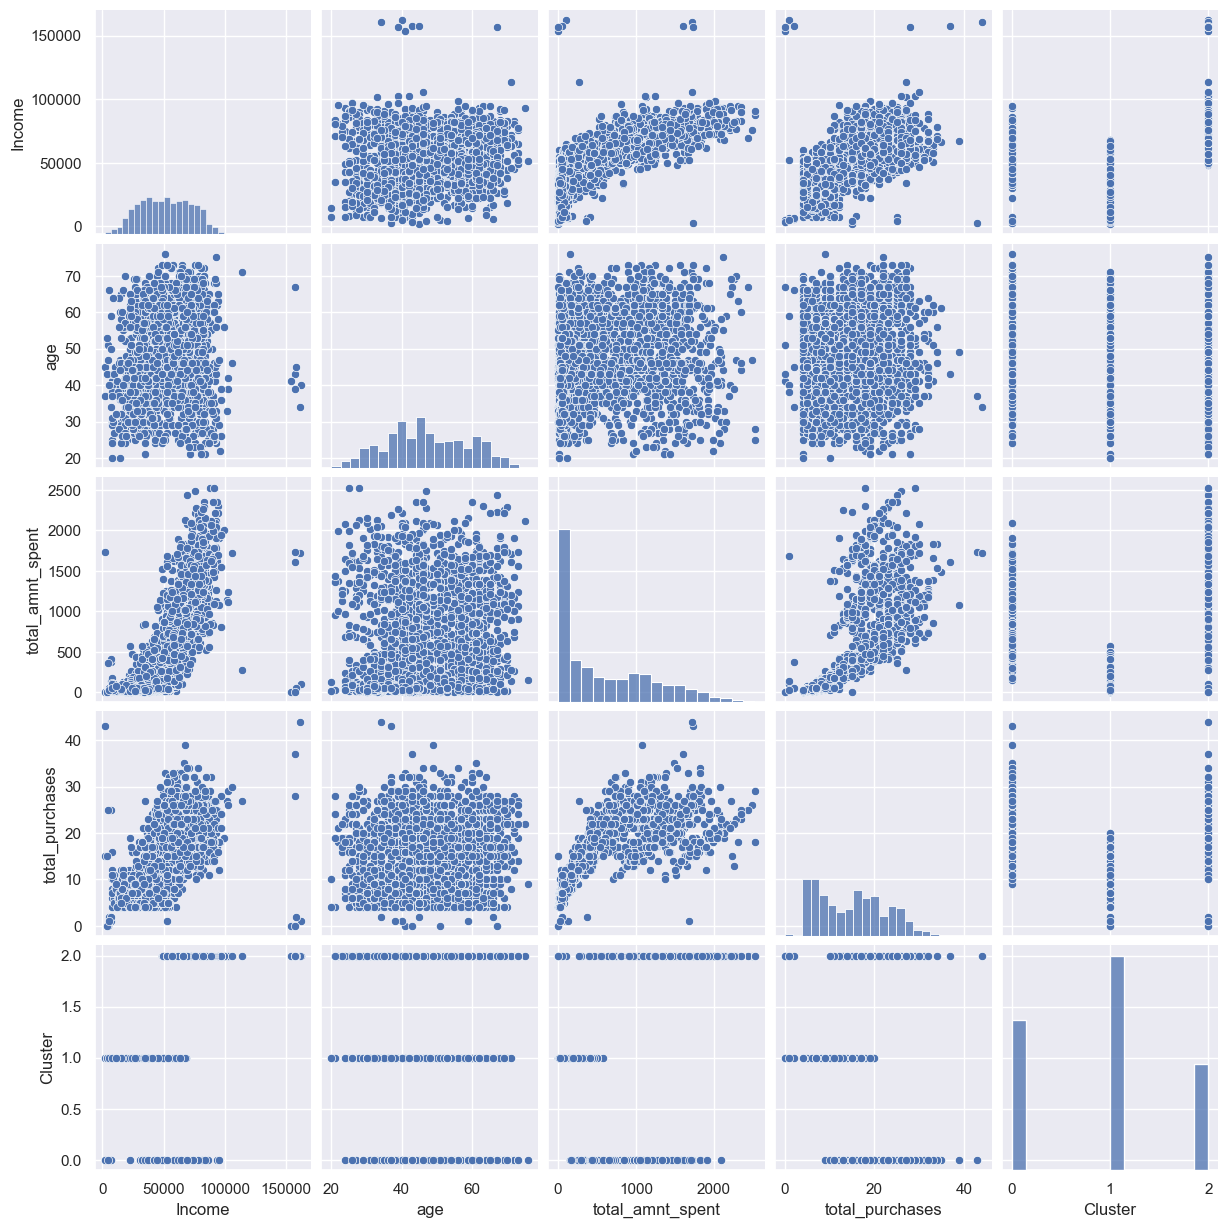

In [212]:
# Pairplot
sns.pairplot(data[['Income','age','total_amnt_spent','total_purchases','Cluster']])
sns.despine()

# No.of customers belonging to different clusters

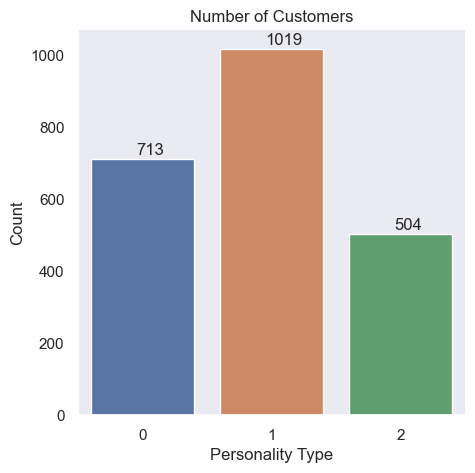

In [213]:
#representing the clusters with the total no.of customers it comprises of.

sns.set_theme(style="darkgrid")
plt.rcParams.update({'axes.grid': False})
plt.figure(figsize =(5, 5))
count_plot = sns.countplot(x = 'Cluster', 
                           data = data)
count_plot.set(xlabel ="Personality Type", 
               ylabel = "Count", 
               title ='Number of Customers')

sns.despine(bottom = False, left = False)
total = len(data)

for p in count_plot.patches:
   count_plot.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))

# Distribution of clusters on the basis of income and total amount spent

<AxesSubplot:xlabel='Income', ylabel='total_amnt_spent'>

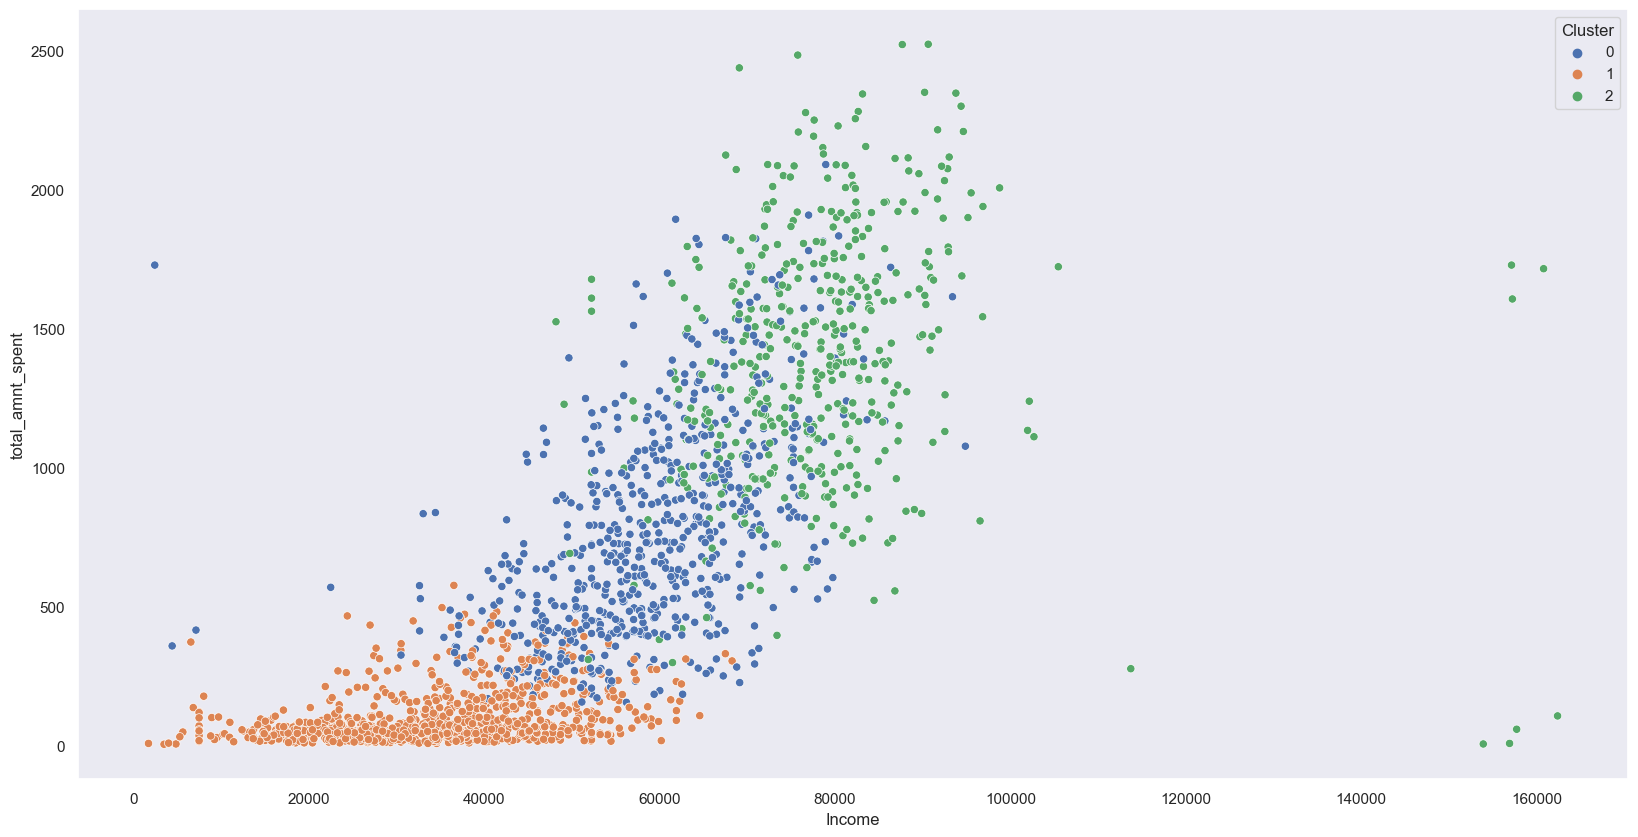

In [214]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=data['Income'],y=data['total_amnt_spent'],hue=data['Cluster'],data=data,palette='deep')

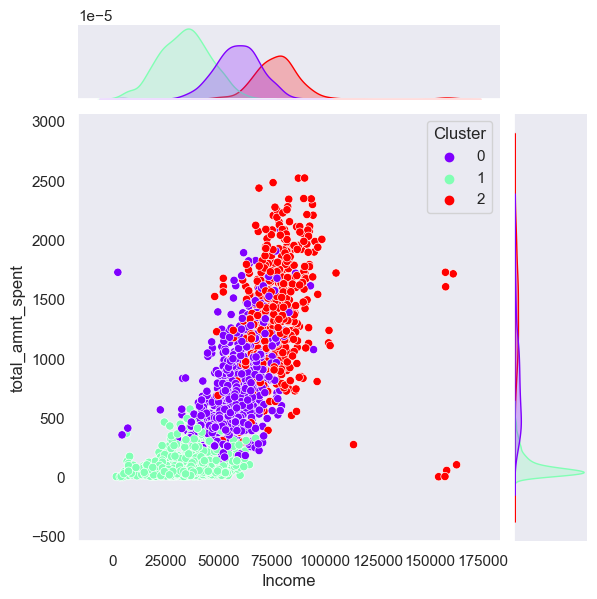

In [215]:
sns.jointplot(data=data, x="Income", y="total_amnt_spent", hue="Cluster",palette='rainbow')

# Distribution of Income according to clusters

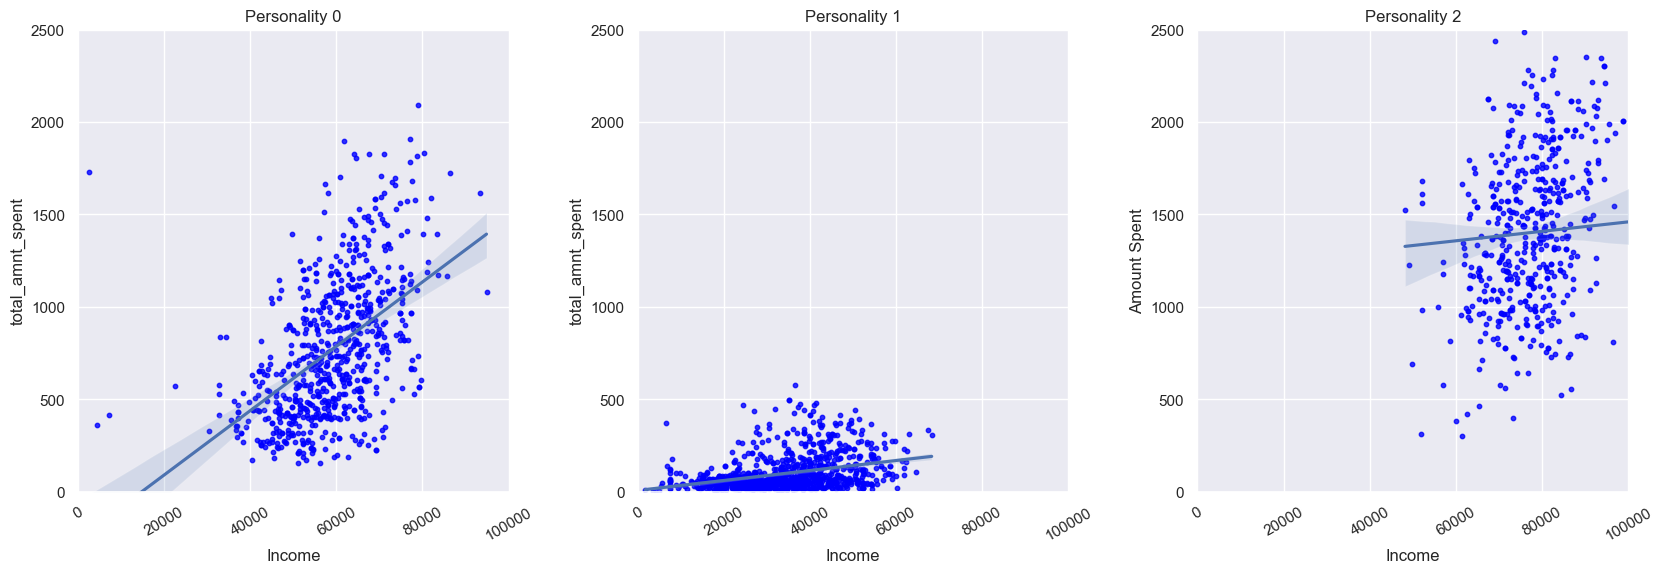

In [216]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(5 * 4,6), sharex=False, sharey=False)

for i in range(0,3):
  axs[i].set_xlim(0,100000)
  axs[i].set_ylim(0,2500)
  axs[i].tick_params(axis='x', rotation=30)
  g = sns.regplot(data = data[data['Cluster']==i],
              x = 'Income',
              y = 'total_amnt_spent', 
              scatter_kws = {'s':10, 'color':'blue'},
              ax = axs[i])
  g.set_title("Personality " + str(i))

g.set(xlabel="Income")
g.set(ylabel="Amount Spent")
fig.subplots_adjust(wspace=0.3)
sns.despine()

Text(0.5, 1.0, 'Distribution of income by Clusters')

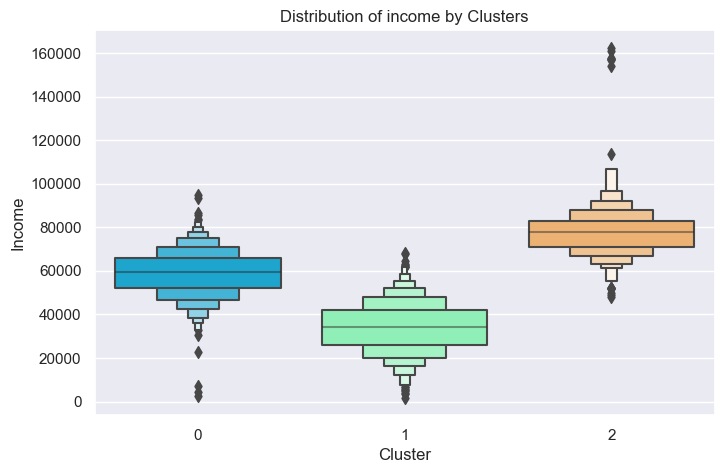

In [217]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='Income', data=data, palette='rainbow')
plt.title("Distribution of income by Clusters")

# Distribution of Total Expenditure by clusters

Text(0.5, 1.0, 'Distribution of expenditure by Clusters')

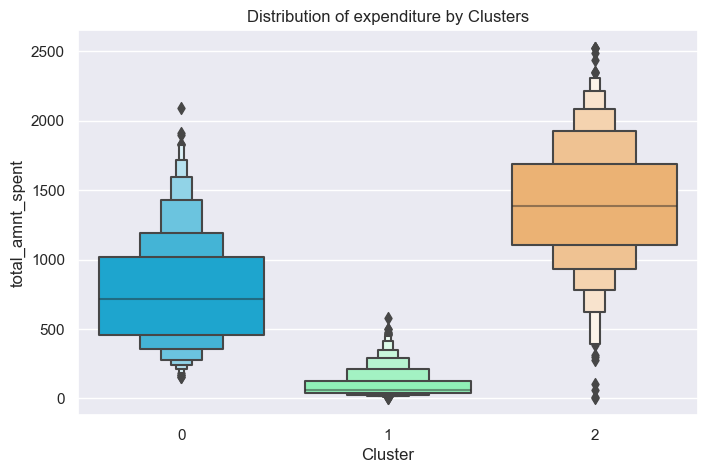

In [218]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='total_amnt_spent', data=data, palette='rainbow')
plt.title("Distribution of expenditure by Clusters")

# Distribution of Total Purchases done by clusters

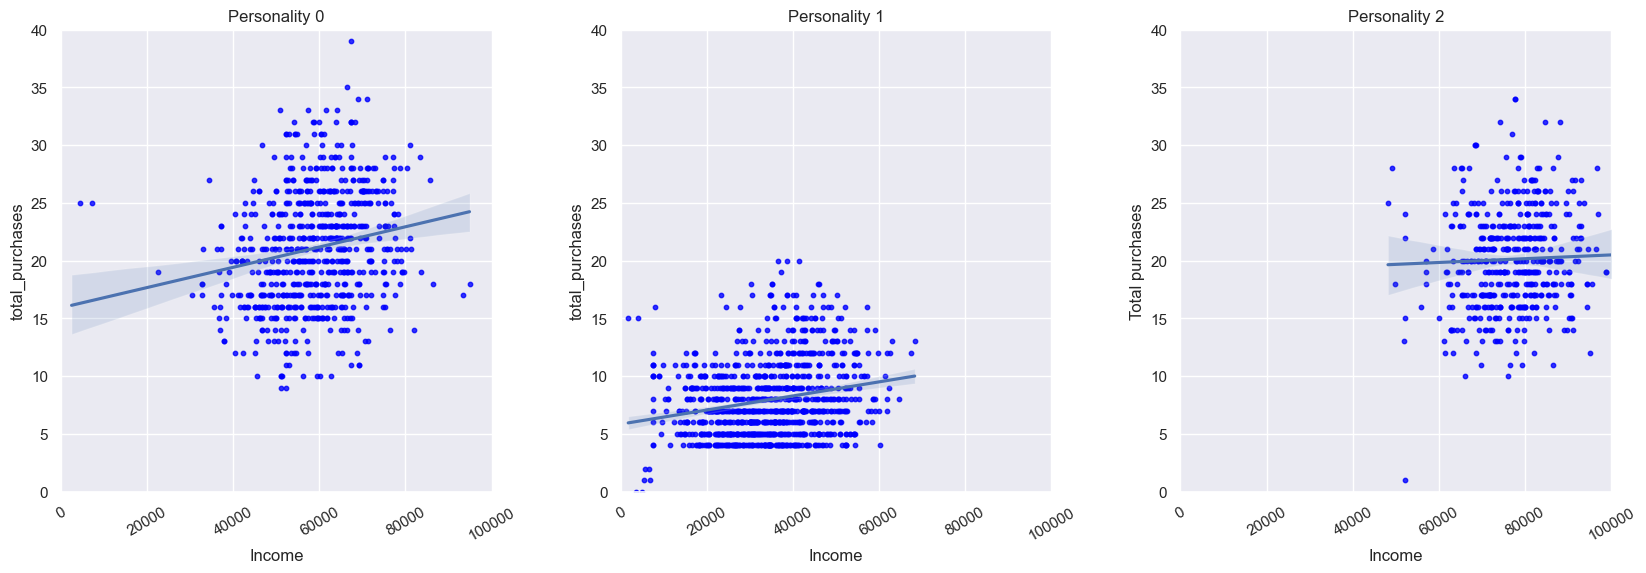

In [219]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(5 * 4,6), sharex=False, sharey=False)

for i in range(0,3):
  axs[i].set_xlim(0,100000)
  axs[i].set_ylim(0,40)
  axs[i].tick_params(axis='x', rotation=30)
  g = sns.regplot(data = data[data['Cluster']==i],
              x = 'Income' ,
              y = 'total_purchases', 
              scatter_kws = {'s':10, 'color':'blue'},
              ax = axs[i])
  g.set_title("Personality " + str(i))

g.set(xlabel="Income")
g.set(ylabel="Total purchases")
fig.subplots_adjust(wspace=0.3)
sns.despine()

Text(0.5, 1.0, 'Distribution of total purchases by Clusters')

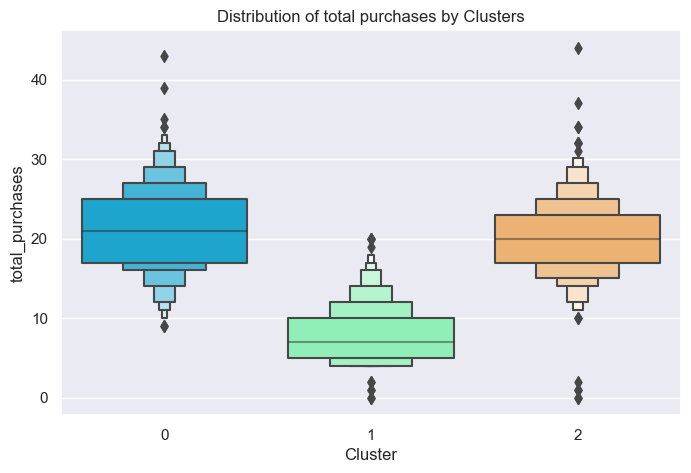

In [220]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='total_purchases', data=data, palette='rainbow')
plt.title("Distribution of total purchases by Clusters")

# Insights from above distribution_

1. customer's income and the total amount spent on items are highly co-related to each other. 
As the income increases the expenditure also increases respectively.

2. Income of customers(approximate) belonging to different clusters._
           cluster 0 --> 40000 -80000
           cluster 1 --> 10000 -60000
           cluster 2 --> 55000 -110000

3. Expenditure of customers._
           cluster 0 --> 250 -1800
           cluster 1 --> 1 - 500
           cluster 2 --> 400 - 2300
            
4. Total purchases varies accordingly with the expenditure and income as follows_
           cluster 0 --> 10 - 35
           cluster 1 --> 1 - 20
           cluster 2 --> 10 - 30
  


# Distribution of Education accross different clusters

<Figure size 1000x1000 with 0 Axes>

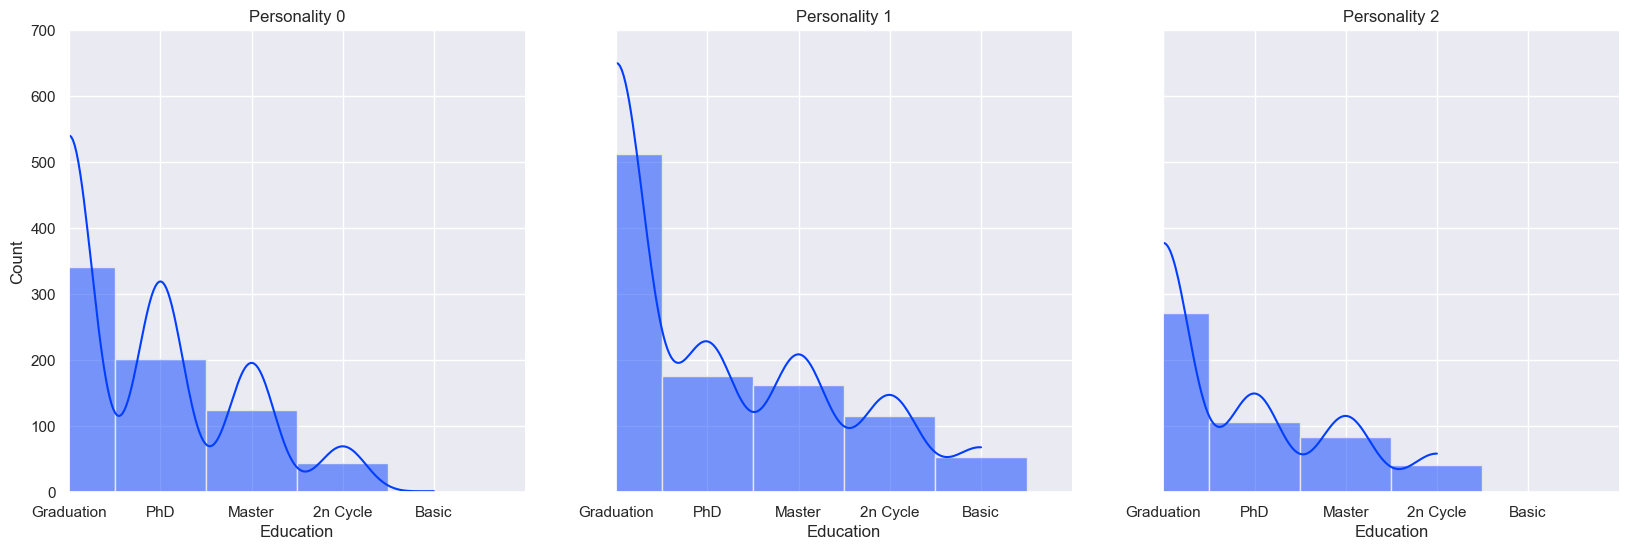

In [221]:

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(ncols=3, figsize=(5 * 4,6), sharex = True, sharey = True)

for i in range(0,3):
  ax[i].set_title("Personality "+str(i))
  ax[i].set_xlim(0,5)
  ax[i].set_ylim(0,700)
  sns.histplot(
      data[data["Cluster"]==i],
      x="Education",
      hue="Cluster",
      multiple="stack",
      palette="bright",
      edgecolor=".9",
      bins= list(range(1,50)),
      ax=ax[i],
      legend=False,
      kde=True,
      element = "bars"
  )
plt.grid(True)
sns.despine()

# Distribution of Age by clusters

Text(0.5, 1.0, 'Distribution of Age by Clusters')

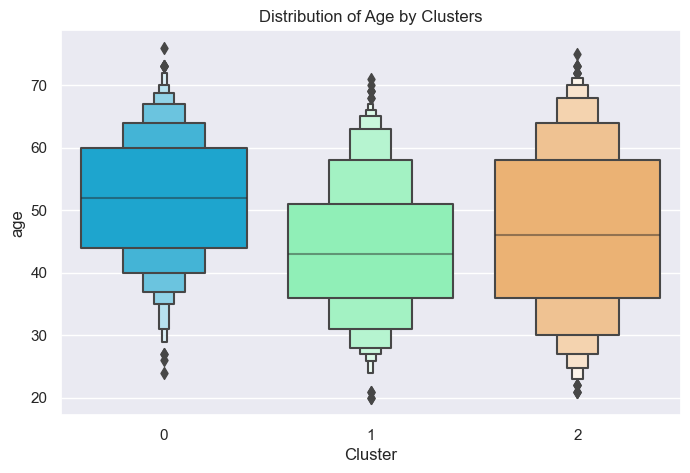

In [222]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='age', data=data, palette='rainbow')
plt.title("Distribution of Age by Clusters")

# Distribution of marrital status and total kids by clusters

Text(0.5, 1.0, 'Distribution of marital status by Clusters')

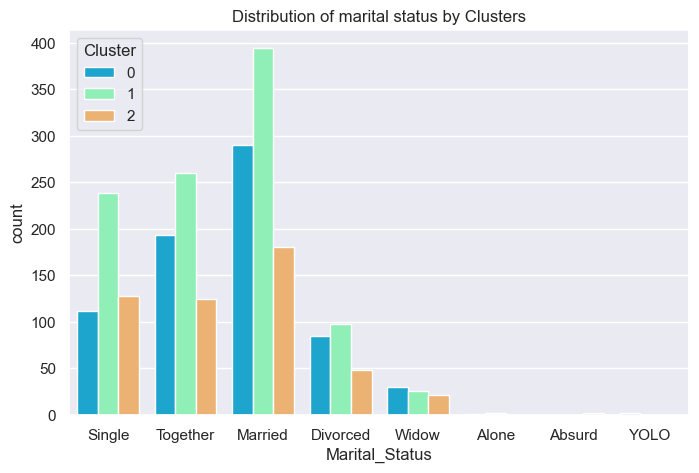

In [223]:
plt.figure(figsize=(8,5))
sns.countplot(hue='Cluster', x='Marital_Status', data=data, palette='rainbow')
plt.title("Distribution of marital status by Clusters")

Text(0.5, 1.0, '')

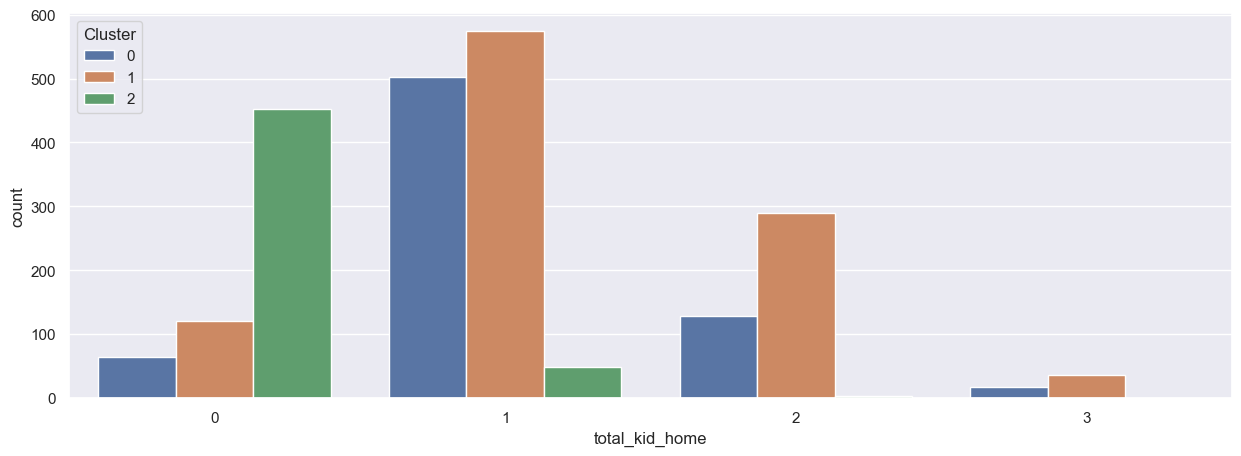

In [224]:
plt.figure(figsize=(15,5))
sns.countplot(x='total_kid_home',data=data,hue='Cluster')
plt.title("")

# Insights from above distributions_

* Each cluster has customers with different educational backgrounds.Except for cluster 1,there are no customers 
 with basic education in cluster 0 and 2.

* In all the clusters there is no significant difference in age and marital status distribution.

* Most of customers of cluster 2 have no kids, whereas cluster 0 and 1 have mostly 1-2 kids and a few have 3 kids.


# Distribution of amount spent on different items by clusters

Text(0.5, 1.0, 'Distribution of Amount spent on wine by Clusters')

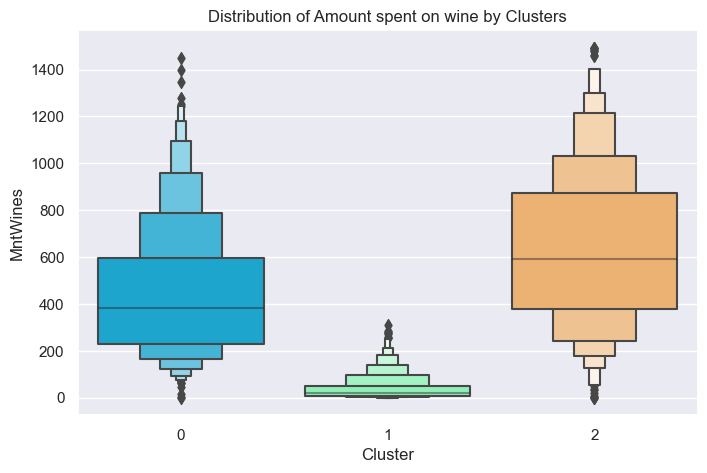

In [225]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='MntWines', data=data, palette='rainbow')
plt.title("Distribution of Amount spent on wine by Clusters")

Text(0.5, 1.0, 'Distribution of Amount spent on fruits by Clusters')

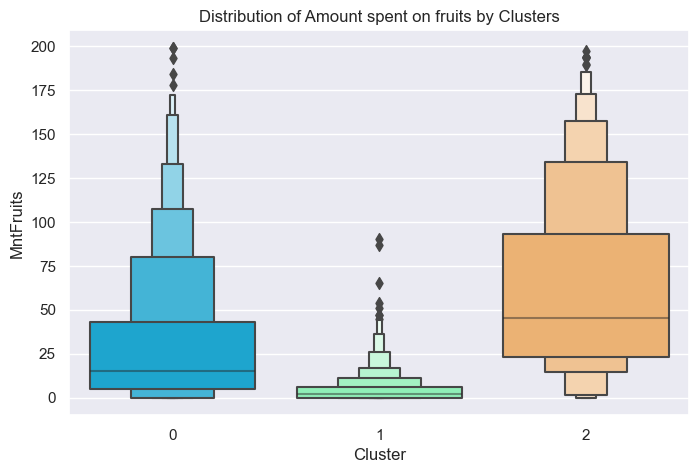

In [226]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='MntFruits', data=data, palette='rainbow')
plt.title("Distribution of Amount spent on fruits by Clusters")

Text(0.5, 1.0, 'Distribution of Amount spent on meat by Clusters')

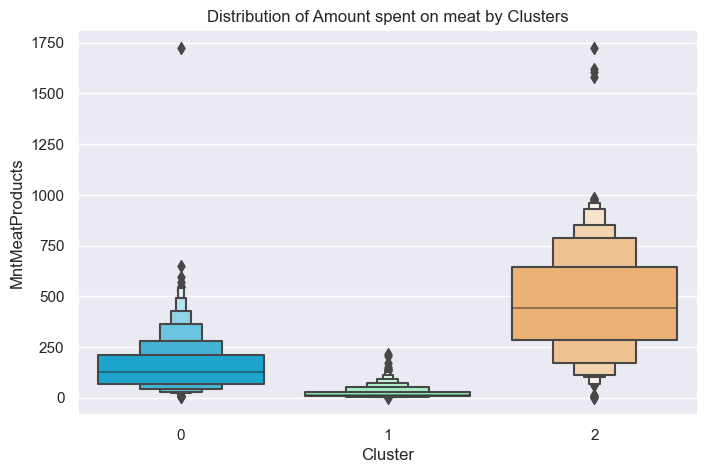

In [227]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='MntMeatProducts', data=data, palette='rainbow')
plt.title("Distribution of Amount spent on meat by Clusters")

Text(0.5, 1.0, 'Distribution of Amount spent on fish products by Clusters')

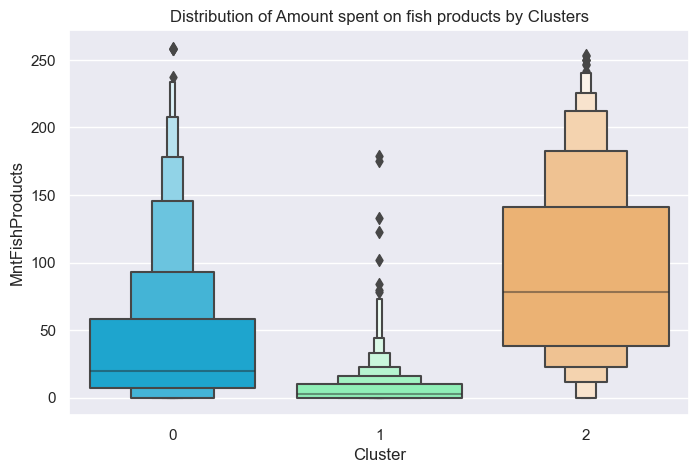

In [228]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='MntFishProducts', data=data, palette='rainbow')
plt.title("Distribution of Amount spent on fish products by Clusters")

Text(0.5, 1.0, 'Distribution of Amount spent on Sweet Products by Clusters')

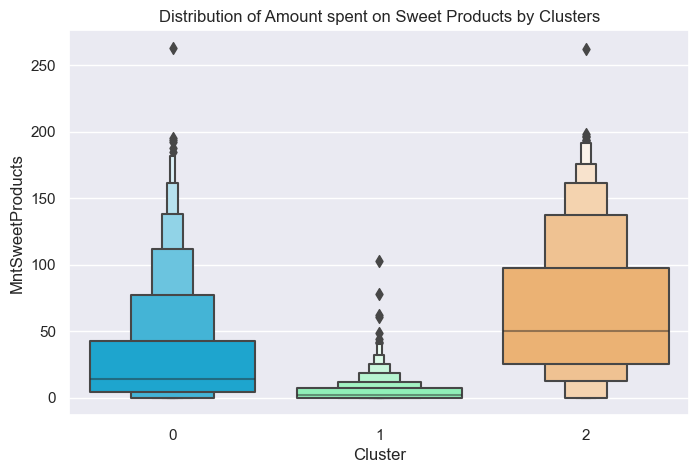

In [250]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='MntSweetProducts', data=data, palette='rainbow')
plt.title("Distribution of Amount spent on Sweet Products by Clusters")

Text(0.5, 1.0, 'Distribution of Amount spent on Gold Products by Clusters')

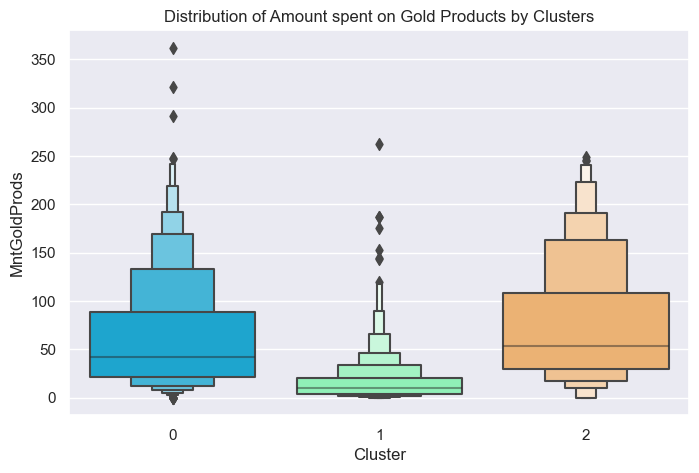

In [230]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='MntGoldProds', data=data, palette='rainbow')
plt.title("Distribution of Amount spent on Gold Products by Clusters")

# Insights from above distributions_

* Customers of cluster 1 spends significantly less amount on each item as compared to that of other clusters.

* For all the items the expenditure is in the sequence as follows_
              
          cluster 2 >> cluster 1 >> cluster 0
          

# Distribution of types of purchases by clusters

Text(0.5, 1.0, 'Distribution of Number of Deals Purchases by Clusters')

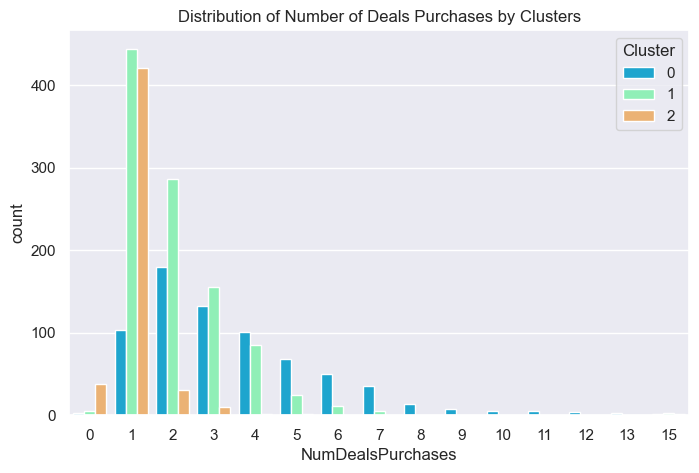

In [231]:
plt.figure(figsize=(8,5))
sns.countplot(hue='Cluster', x='NumDealsPurchases', data=data, palette='rainbow')
plt.title("Distribution of Number of Deals Purchases by Clusters")

Text(0.5, 1.0, 'Distribution of Number of Deals Purchases by Clusters')

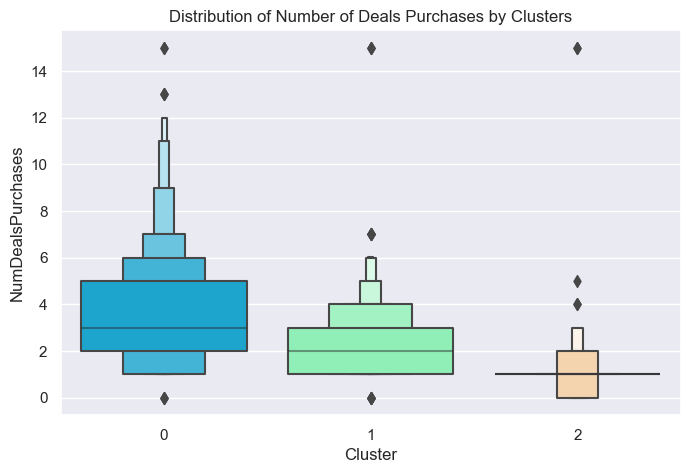

In [232]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='NumDealsPurchases', data=data, palette='rainbow')
plt.title("Distribution of Number of Deals Purchases by Clusters")

Text(0.5, 1.0, 'Distribution of Number of Web Purchases by Clusters')

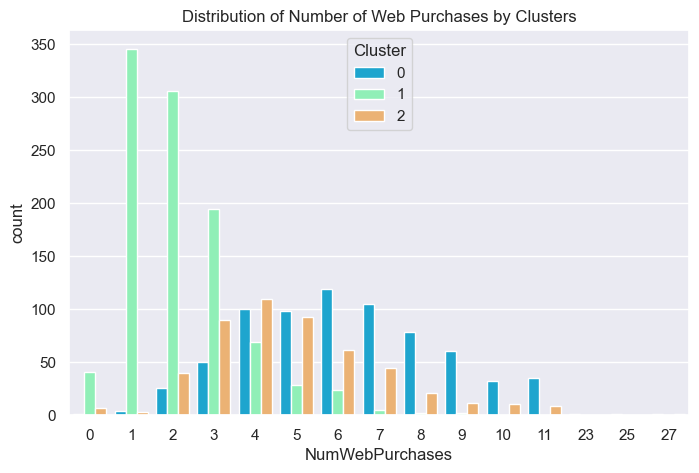

In [233]:
plt.figure(figsize=(8,5))
sns.countplot(hue='Cluster', x='NumWebPurchases', data=data, palette='rainbow')
plt.title("Distribution of Number of Web Purchases by Clusters")

Text(0.5, 1.0, 'Distribution of Number of Web Purchases by Clusters')

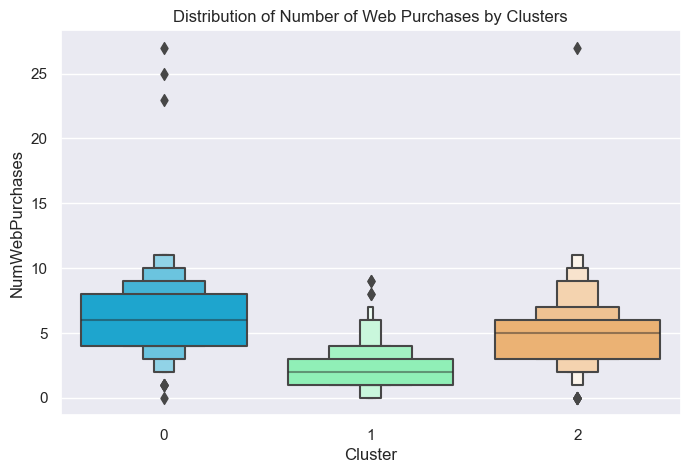

In [234]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='NumWebPurchases', data=data, palette='rainbow')
plt.title("Distribution of Number of Web Purchases by Clusters")

Text(0.5, 1.0, 'Distribution of Number of Catalog Purchases by Clusters')

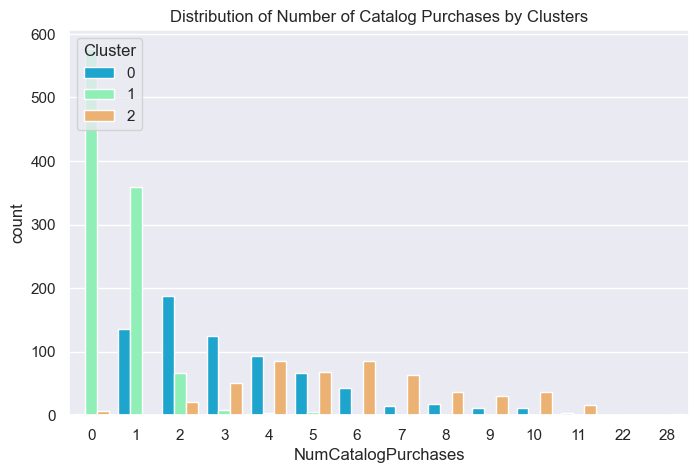

In [235]:
plt.figure(figsize=(8,5))
sns.countplot(hue='Cluster', x='NumCatalogPurchases', data=data, palette='rainbow')
plt.title("Distribution of Number of Catalog Purchases by Clusters")

Text(0.5, 1.0, 'Distribution of Number of Catalog Purchases by Clusters')

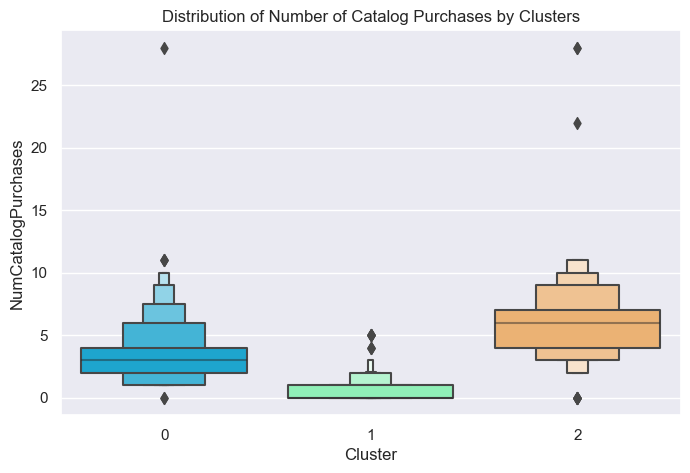

In [236]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='NumCatalogPurchases', data=data, palette='rainbow')
plt.title("Distribution of Number of Catalog Purchases by Clusters")

Text(0.5, 1.0, 'Distribution of Number of Store Purchases by Clusters')

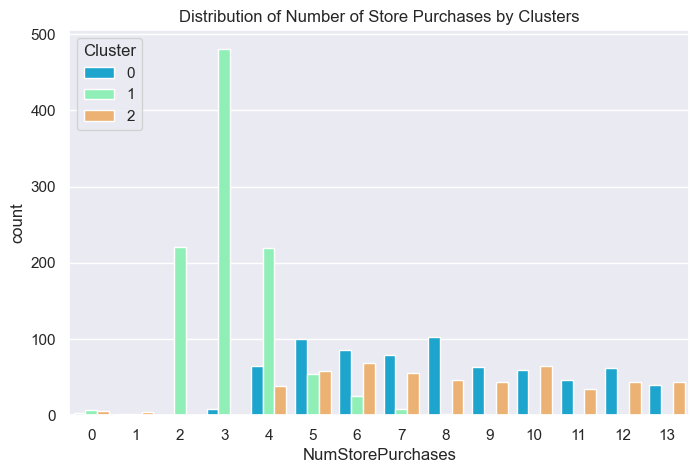

In [237]:
plt.figure(figsize=(8,5))
sns.countplot(hue='Cluster', x='NumStorePurchases', data=data, palette='rainbow')
plt.title("Distribution of Number of Store Purchases by Clusters")

Text(0.5, 1.0, 'Distribution of Number of Store Purchases by Clusters')

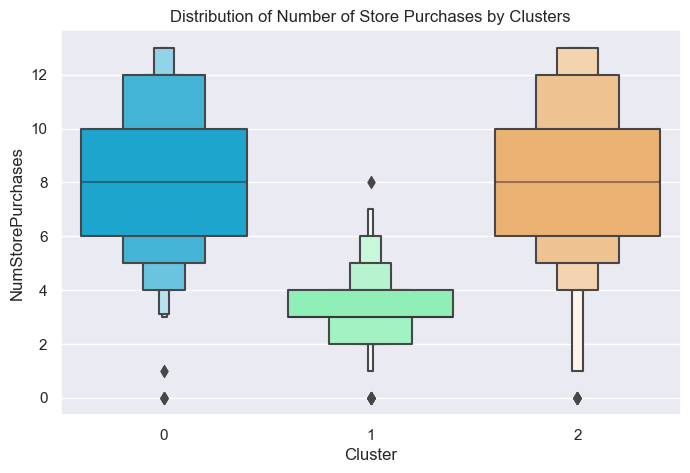

In [238]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='NumStorePurchases', data=data, palette='rainbow')
plt.title("Distribution of Number of Store Purchases by Clusters")

# Insights from above distributions_

* Contrary to cluster 2, cluster 0 customers buy the most deals,followed by cluster 1.

* Web purchases are most common in cluster 0 cutomers.

* Catalog purchases are highest amongst cluster 2 customers.

* Store purchases are mostly done by cluster 0 and 2.




# Distribution of web visits, offers accepted,complain,membership,recency by clusters

Text(0.5, 1.0, 'Distribution of Number of Web Visits per month by Clusters')

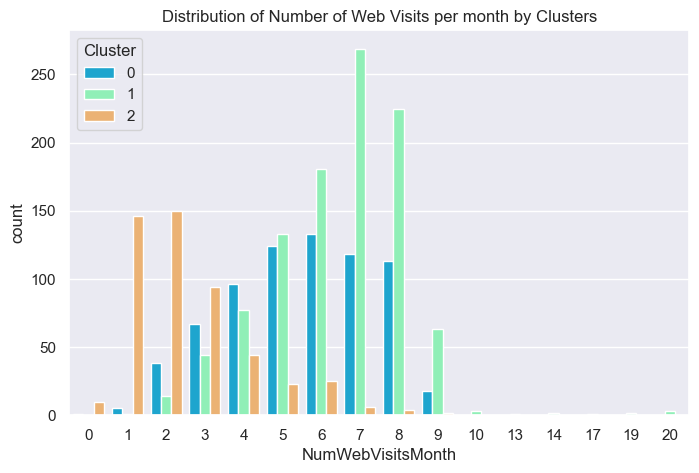

In [239]:
# Distribution of no. of web visits/month by clusters

plt.figure(figsize=(8,5))
sns.countplot(x='NumWebVisitsMonth', data=data,hue='Cluster', palette='rainbow')
plt.title("Distribution of Number of Web Visits per month by Clusters")

In [240]:
# Distribution of offers accepted by clusters

Text(0.5, 1.0, 'Distribution of total_offers_accepted by Clusters')

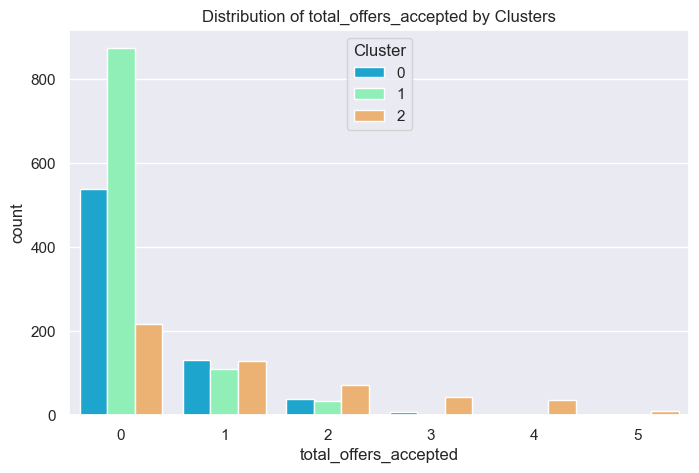

In [241]:
plt.figure(figsize=(8,5))
sns.countplot(x='total_offers_accepted', data=data, hue ='Cluster',palette='rainbow')
plt.title("Distribution of total_offers_accepted by Clusters")

In [242]:
# Distribution of complain by clusters

Text(0.5, 1.0, 'Distribution of complain by Clusters')

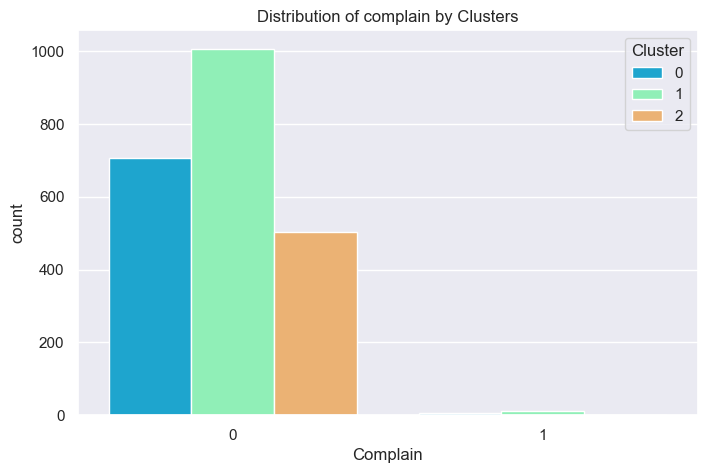

In [243]:
plt.figure(figsize=(8,5))
sns.countplot(x='Complain', data=data,hue='Cluster', palette='rainbow')
plt.title("Distribution of complain by Clusters")

Text(0.5, 1.0, 'Distribution of membership(days) by Clusters')

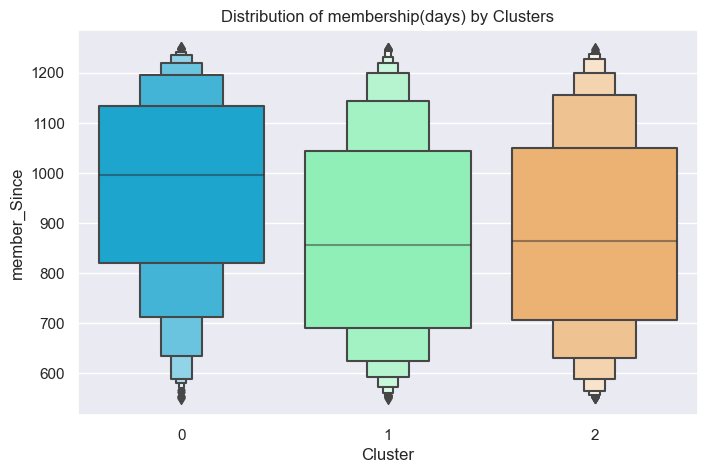

In [244]:
#Disrtibution of membership by cluster

plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='member_Since', data=data, palette='rainbow')
plt.title("Distribution of membership(days) by Clusters")

Text(0.5, 1.0, 'Distribution of recent purchase by Clusters')

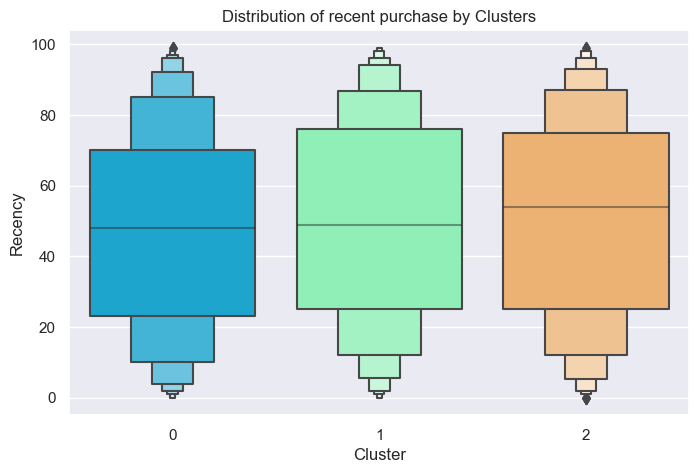

In [245]:
#Distribution of recent purchases by clusters

plt.figure(figsize=(8,5))
sns.boxenplot(x='Cluster', y='Recency', data=data, palette='rainbow')
plt.title("Distribution of recent purchase by Clusters")

# Insights from above distributions_

* The highest no.of web visits are done by cluster 1 customers as compared to cluster 0 and 2.

* Highest no.of offers are accepted by cluster 2 customers.

* Days of membership and recency of purchase does not change singnificantly across different clusters.

<Figure size 3000x1500 with 0 Axes>

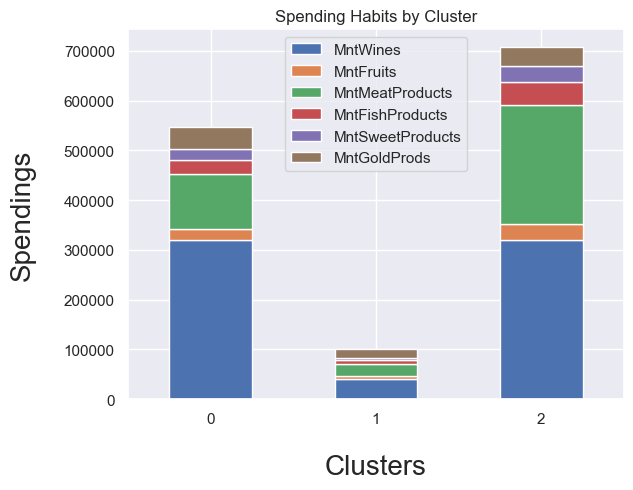

In [246]:
## Distribution of Expenditure 

cluster_spendings =data.groupby('Cluster')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(30,15))
cluster_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

<Figure size 3000x1500 with 0 Axes>

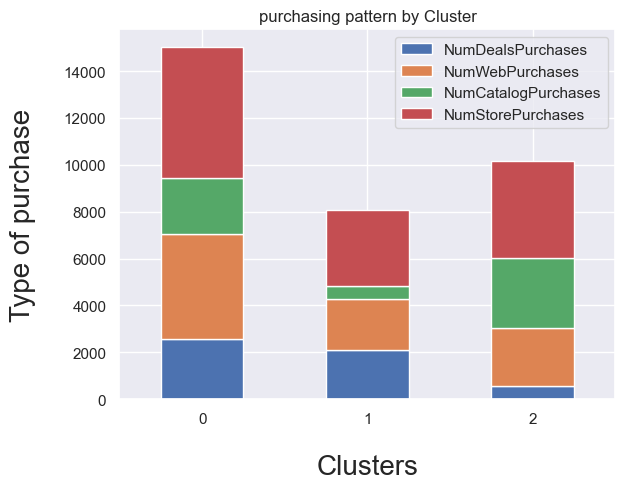

In [247]:
cluster_spendings =data.groupby('Cluster')[[ 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                'NumStorePurchases']].sum()

plt.figure(figsize=(30,15))
cluster_spendings.plot(kind='bar', stacked=True)

plt.title('purchasing pattern by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Type of purchase', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

<Figure size 3000x1500 with 0 Axes>

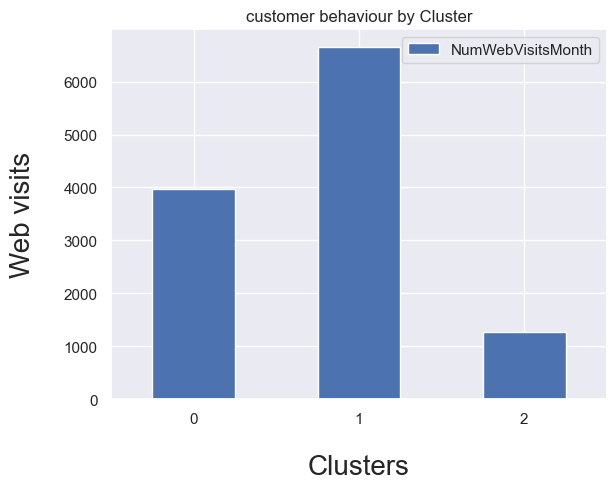

In [248]:
cluster_spendings =data.groupby('Cluster')[[ 'NumWebVisitsMonth']].sum()

plt.figure(figsize=(30,15))
cluster_spendings.plot(kind='bar', stacked=True)

plt.title('customer behaviour by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Web visits', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

<Figure size 3000x1500 with 0 Axes>

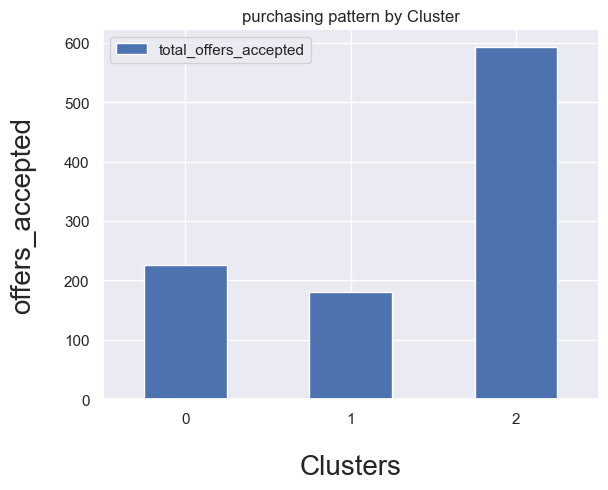

In [249]:
cluster_spendings =data.groupby('Cluster')[[ 'total_offers_accepted']].sum()

plt.figure(figsize=(30,15))
cluster_spendings.plot(kind='bar', stacked=True)

plt.title('purchasing pattern by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('offers_accepted', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

# Conclusion

# Commonalities in customers.

* Mostly all customers are well educated.
* Ages of customers belonging to different clusters lies in the same range.
* No singnificant variation in marital status among different clusters.
* cluster 0 and 1 mostly have 1-2 kids at home, a few have 3 kids.
* Majority of the customers don't complain.


# Attributes of customers belonging to different clusters._


cluster 0 --->
 * Well educated customers with medium income range (i.e.between 40000$-80000$).
 * Buy the highest no.of deals among all the clusters.
 * 2nd highest web visitors.
    
cluster 1 --->
 * Except some having basic education customers with low income range (i.e.between 10000$-60000$).
 * Spends overall very less amount on everything. 
 * Highest no.of web visits.
    
cluster 2 --->
 * Customers with highest income range (i.e. between 55000$-110000$).  
 * Total expenditure is highest among all clusters,spends highest amount on wine.
 * Do most of the catalog purchases,deals purchases are very less.
 * Mostly accept offers.
 * Lowest no.of web visits.
 